In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from pandas.plotting import lag_plot
from statsmodels.tsa import stattools
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
import statsmodels.api as sm
from utils import *
%matplotlib inline
plt.rc('figure', figsize=(15.0, 10.0))


In [2]:
data = pd.read_csv('data_saving_loading/monthdata.csv', header=None, index_col=['datetime'], names=['datetime', 'load'], parse_dates=['datetime'], infer_datetime_format=True)

In [3]:
# data = data.asfreq(freq='H', method='bfill')  # sample the data in hourly manner

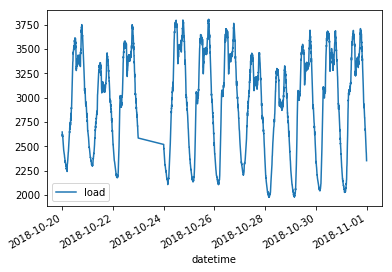

In [4]:
data['20-10-2018':].plot()

In [22]:
data['23-10-2018']

,load
datetime,


In [7]:
load_values = data['28-10-2018':]['load'].values

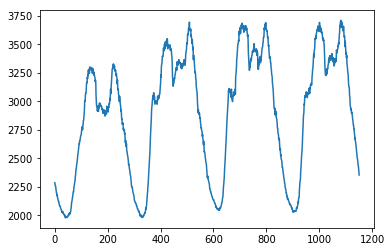

In [8]:
plt.plot(load_values)

In [9]:
load_values.shape[0] / 288

4.0

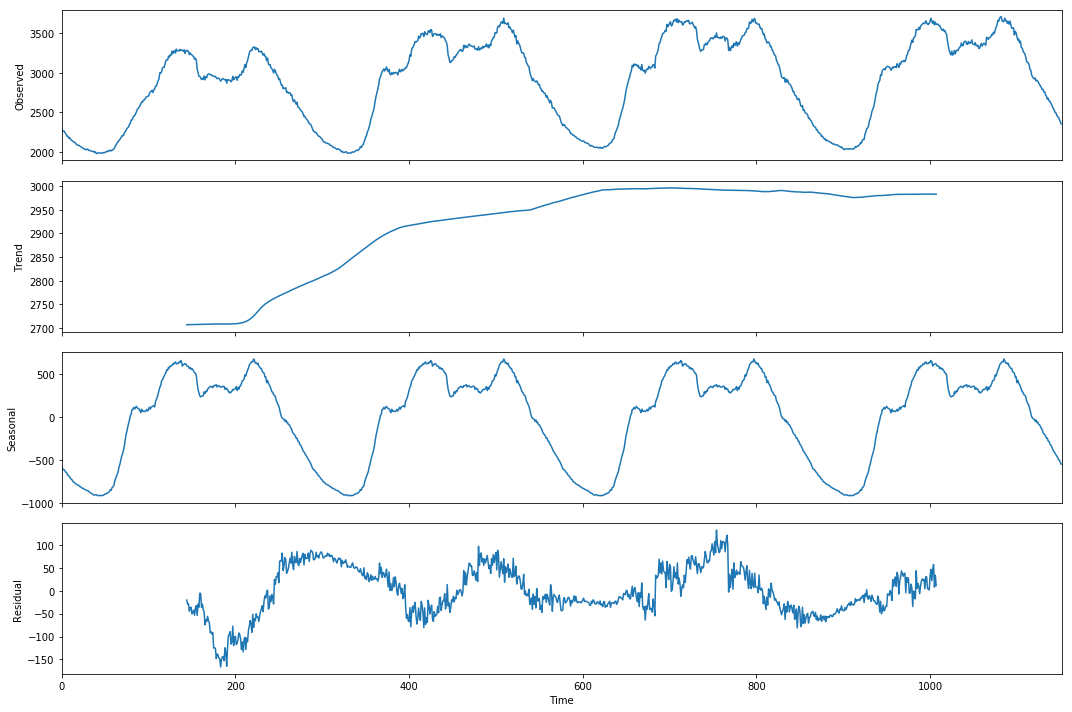

In [12]:
# fig = plt.figure(figsize=(10,10))
decomposition = seasonal_decompose(load_values, freq=288, model = 'additive')
decomposition.plot();

### Note: analysing the seasonal_decompose's output we can conclude that the seasonality is additive type and trend varies through out the year, sometimes increasing sometimes decreasing

In [61]:
load_values.shape

(2016,)

In [66]:
load_values = data['load'].values[- 288 * 1:]

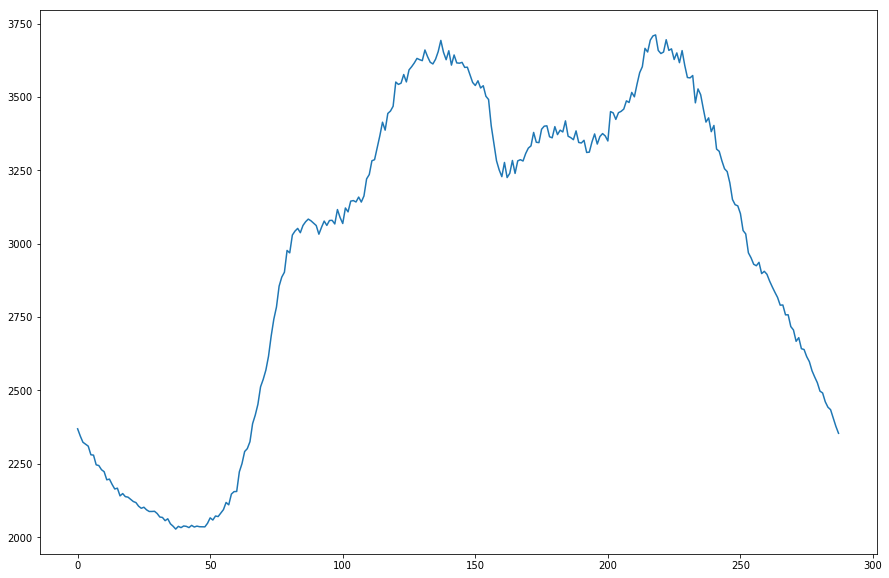

In [67]:
plt.plot(load_values)

In [70]:
load_values.shape

(288,)

In [16]:
# y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(load_values ,seasonal_periods=6,trend='add', seasonal='add',).fit()

In [17]:
y_hat = fit1.forecast(288)

In [18]:
y_hat

array([ 2330.20728016,  2306.26820166,  2282.71792404,  2259.74051795,
        2237.29455075,  2213.24646623,  2187.85304272,  2163.91396421,
        2140.3636866 ,  2117.38628051,  2094.94031331,  2070.89222879,
        2045.49880528,  2021.55972677,  1998.00944916,  1975.03204306,
        1952.58607587,  1928.53799135,  1903.14456783,  1879.20548933,
        1855.65521172,  1832.67780562,  1810.23183843,  1786.18375391,
        1760.79033039,  1736.85125189,  1713.30097428,  1690.32356818,
        1667.87760099,  1643.82951647,  1618.43609295,  1594.49701445,
        1570.94673684,  1547.96933074,  1525.52336355,  1501.47527903,
        1476.08185551,  1452.14277701,  1428.5924994 ,  1405.6150933 ,
        1383.16912611,  1359.12104159,  1333.72761807,  1309.78853957,
        1286.23826195,  1263.26085586,  1240.81488867,  1216.76680415,
        1191.37338063,  1167.43430213,  1143.88402451,  1120.90661842,
        1098.46065123,  1074.4125667 ,  1049.01914319,  1025.08006468,
      

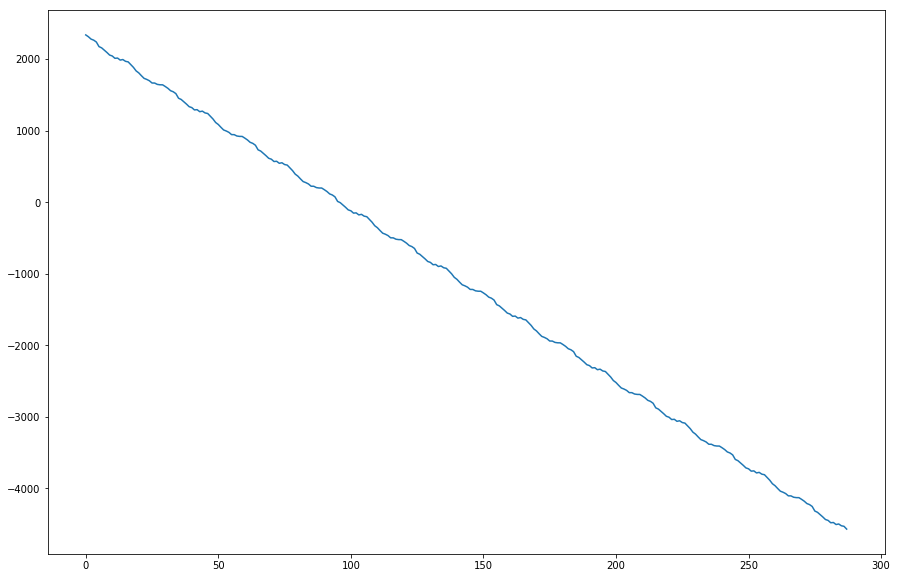

In [56]:
plt.plot(y_hat)

In [ ]:
y_hat_avg['Holt_Winter'] = fit1.forecast(10)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()